# Neural IBM1 - Task 2


In [7]:
#imports
import tensorflow as tf
import numpy as np
from pprint import pprint
import pickle
from statstracker import StatsTracker
%pylab inline
from utils import smart_reader, bitext_reader, iterate_minibatches, prepare_data
from vocabulary import OrderedCounter, Vocabulary

Populating the interactive namespace from numpy and matplotlib


In [8]:
#Get vocab
train_e_path = 'data/training/hansards.36.2.e.gz'
train_f_path = 'data/training/hansards.36.2.f.gz'
dev_e_path = 'data/validation/dev.e.gz'
dev_f_path = 'data/validation/dev.f.gz'
dev_wa = 'data/validation/dev.wa.nonullalign'
test_e_path = 'data/test/test.e.gz'
test_f_path = 'data/test/test.f.gz'
test_wa = 'data/test/test.wa.nonullalign'

max_tokens=1000

corpus_e = smart_reader(train_e_path)
vocabulary_e = Vocabulary(corpus=corpus_e, max_tokens=max_tokens)
# pickle.dump(vocabulary_e, open("vocabulary_e.pkl", mode="wb"))

corpus_f = smart_reader(train_f_path)
vocabulary_f = Vocabulary(corpus=corpus_f, max_tokens=max_tokens)
# pickle.dump(vocabulary_f, open("vocabulary_f.pkl", mode="wb"))

test_corpus = list(bitext_reader(
            smart_reader(test_e_path),
            smart_reader(test_f_path)))

In [9]:
#Get models for Task 2 (concatenation & gate)
from neuralibm1_T2_concat import NeuralIBM1Model_T2
from neuralibm1_T2_gate import NeuralIBM1Model_T2_gate

# check neuralibm1trainer.py for the Trainer code
from neuralibm1trainer import NeuralIBM1Trainer_T2_gate, NeuralIBM1Trainer_T2_concat

Task 2 with concatenation
Training with B=128 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 62.088318 accuracy 0.18 lr 0.001000
Iter   200 loss 56.778362 accuracy 0.18 lr 0.001000
Iter   300 loss 59.712906 accuracy 0.19 lr 0.001000
Iter   400 loss 54.220207 accuracy 0.19 lr 0.001000
Iter   500 loss 55.068775 accuracy 0.20 lr 0.001000
Iter   600 loss 45.658283 accuracy 0.23 lr 0.001000
Iter   700 loss 52.755466 accuracy 0.21 lr 0.001000
Iter   800 loss 49.460342 accuracy 0.23 lr 0.001000
Iter   900 loss 49.827915 accuracy 0.25 lr 0.001000
Iter  1000 loss 46.378613 accuracy 0.24 lr 0.001000
Iter  1100 loss 44.702484 accuracy 0.23 lr 0.001000
Iter  1200 loss 46.446022 accuracy 0.22 lr 0.001000
Iter  1300 loss 44.081280 accuracy 0.23 lr 0.001000
Epoch 1 loss 50.958962 accuracy 0.21 val_aer 0.93 val_acc 0.27
Model saved in file: D:\Userdata\Sync\universiteit\MSc\Jaar 1\Natural Language Processing 2\nlp2\project 3\mode

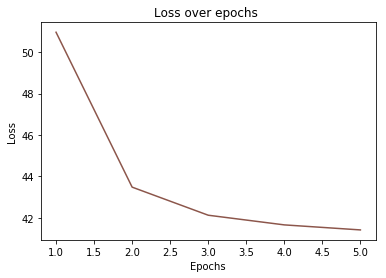

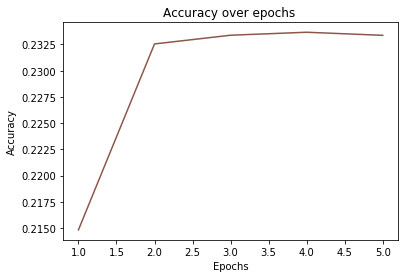

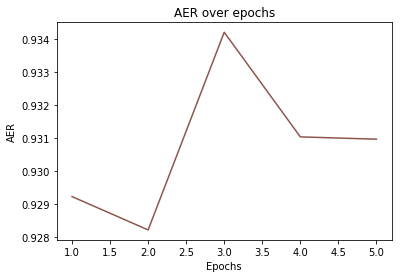

In [10]:
# Run model task 2 with concatenation:
tf.reset_default_graph()

with tf.Session() as sess:

  print("Task 2 with concatenation")
  # some hyper-parameters
  # tweak them as you wish
  batch_size=128  # on CPU, use something much smaller e.g. 1-16
  max_length=30
  lr = 0.001
  lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
  emb_dim = 64
  mlp_dim = 128

  stats_tracker = StatsTracker()
  # our model
  model = NeuralIBM1Model_T2(
    x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f,
    batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess)

  # our trainer
  trainer = NeuralIBM1Trainer_T2_concat(
    model, train_e_path, train_f_path,
    dev_e_path, dev_f_path, dev_wa,
    num_epochs=5, batch_size=batch_size,
    max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess)

  # now first TF needs to initialize all the variables
  print("Initializing variables..")
  sess.run(tf.global_variables_initializer())

  # now we can start training!
  print("Training started..")
  trainer.train(stats_tracker)
    
  test_aer, test_acc = trainer.model.evaluate(
                test_corpus, test_wa)   
  print("Testset accuracy: {}, AER: {}".format(test_acc, test_aer))


Task 2 with Gate
Training with B=128 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 57.523331 accuracy 0.17 lr 0.001000
Iter   200 loss 45.442871 accuracy 0.27 lr 0.001000
Iter   300 loss 46.680466 accuracy 0.27 lr 0.001000
Iter   400 loss 48.567596 accuracy 0.27 lr 0.001000
Iter   500 loss 44.297203 accuracy 0.29 lr 0.001000
Iter   600 loss 40.280579 accuracy 0.30 lr 0.001000
Iter   700 loss 41.692719 accuracy 0.30 lr 0.001000
Iter   800 loss 43.586178 accuracy 0.31 lr 0.001000
Iter   900 loss 38.639301 accuracy 0.29 lr 0.001000
Iter  1000 loss 41.684841 accuracy 0.26 lr 0.001000
Iter  1100 loss 47.495285 accuracy 0.26 lr 0.001000
Iter  1200 loss 42.451103 accuracy 0.30 lr 0.001000
Iter  1300 loss 39.516434 accuracy 0.28 lr 0.001000
Epoch 1 loss 45.442880 accuracy 0.27 val_aer 0.85 val_acc 0.27
Model saved in file: D:\Userdata\Sync\universiteit\MSc\Jaar 1\Natural Language Processing 2\nlp2\project 3\model.ckpt
Sh

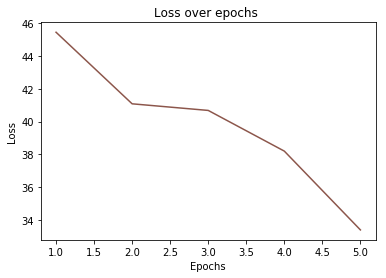

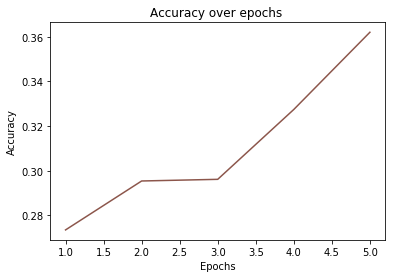

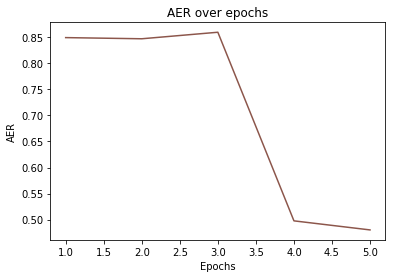

In [11]:
# Run model task 2 with gate:
tf.reset_default_graph()

with tf.Session() as sess:

  print("Task 2 with Gate")
  # some hyper-parameters
  # tweak them as you wish
  batch_size=128  # on CPU, use something much smaller e.g. 1-16
  max_length=30
  lr = 0.001
  lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
  emb_dim = 64
  mlp_dim = 128

  stats_tracker2 = StatsTracker()
  # our model
  model = NeuralIBM1Model_T2_gate(
    x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f,
    batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess)

  # our trainer
  trainer = NeuralIBM1Trainer_T2_gate(
    model, train_e_path, train_f_path,
    dev_e_path, dev_f_path, dev_wa,
    num_epochs=5, batch_size=batch_size,
    max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess)

  # now first TF needs to initialize all the variables
  print("Initializing variables..")
  sess.run(tf.global_variables_initializer())

  # now we can start training!
  print("Training started..")
  trainer.train(stats_tracker2)

  test_aer, test_acc = trainer.model.evaluate(
                test_corpus, test_wa)   
  print("Resulting AER: {}, accuracy: {}".format(test_aer, test_acc))